## Download and load the dataset

Download the Titanic dataset and load it into a pandas DataFrame.



Import the pandas library, define the URL, read the CSV into a DataFrame, and display the head to confirm loading.




Display the first few rows, check data types, and look for missing values.



Display the first few rows, data types, and missing values of the dataframe to understand its structure and identify areas for cleaning.



In [2]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handle missing value
Address missing values in relevant columns using appropriate techniques.



Impute missing values in 'Age' and 'Embarked' columns and drop the 'Cabin' column, then verify no missing values remain.



In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-1735679289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1735679289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Encode categorical features

Convert categorical columns into a numerical format suitable for machine learning models.



Identify categorical columns and apply one-hot encoding to convert them into a numerical format suitable for machine learning models. Then, concatenate the one-hot encoded columns with the original DataFrame and drop the original categorical columns.



In [4]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Feature scaling


Scale numerical features to a similar range.



Identify numerical columns, instantiate StandardScaler, fit and transform the numerical columns, and replace the original columns with scaled values.



In [5]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['Survived', 'PassengerId'])

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Identify and handle outliers
Visualize outliers and decide on a strategy to handle them.



Select numerical columns, excluding 'PassengerId' and 'Survived', and create box plots to visualize outliers in these columns.



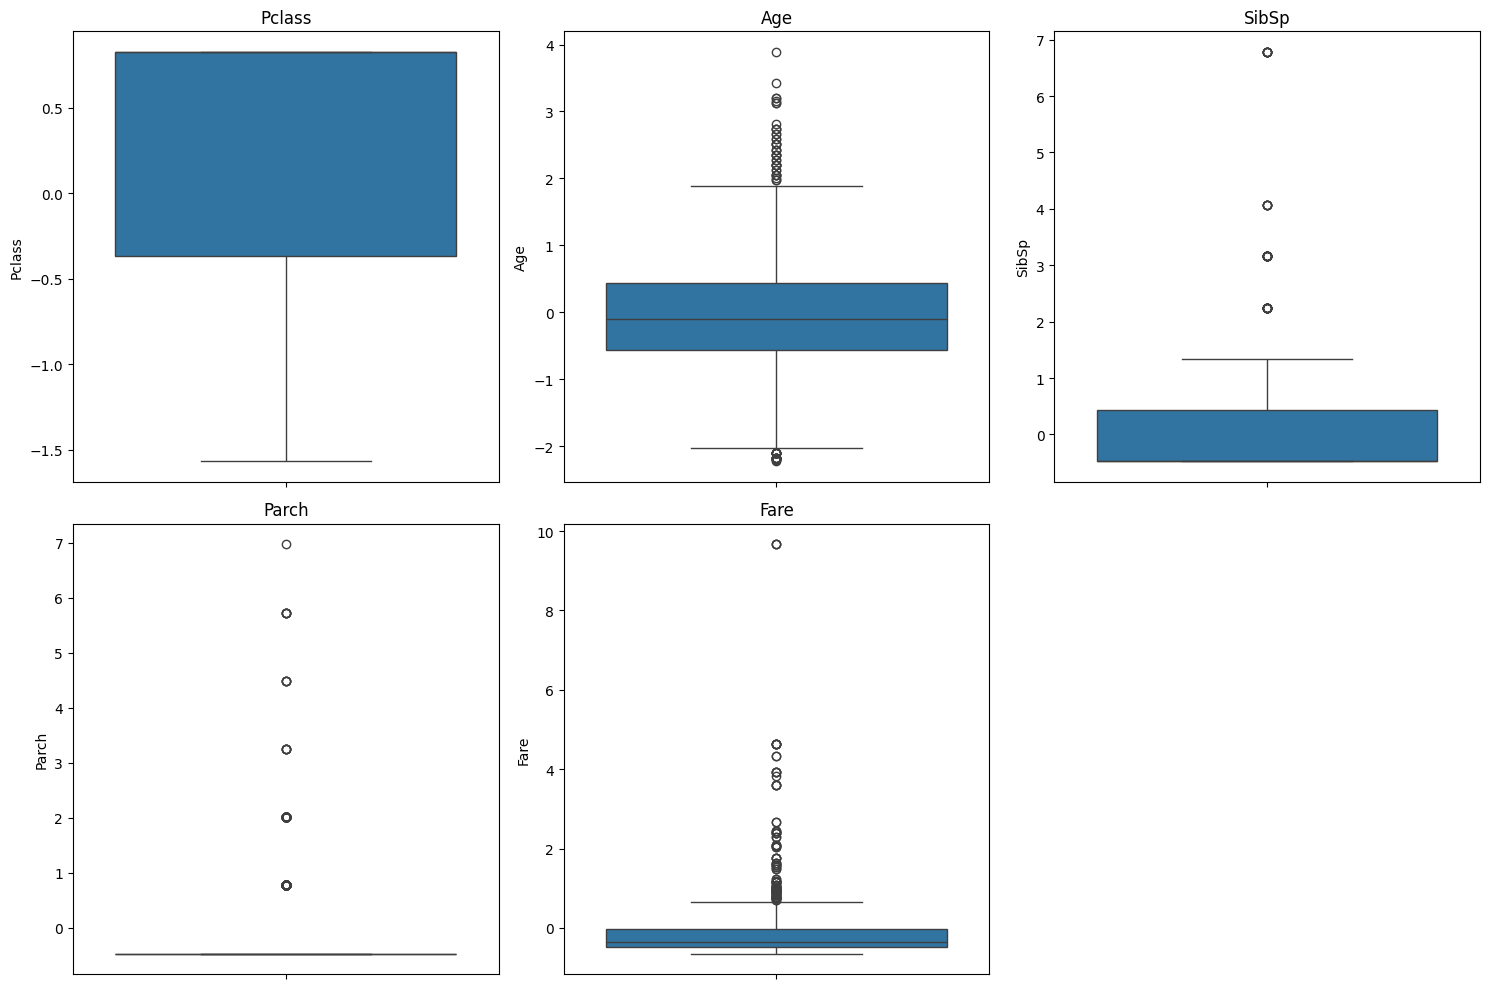

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop(['PassengerId', 'Survived'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains missing values in the 'Age', 'Cabin', and 'Embarked' columns, with 'Cabin' having a substantial number of missing entries.
*   Missing values in 'Age' were imputed with the median, and missing values in 'Embarked' were imputed with the mode. The 'Cabin' column was dropped due to a high number of missing values.
*   Categorical features ('Sex' and 'Embarked') were successfully one-hot encoded, creating new numerical columns and removing the original categorical columns.
*   Numerical features ('Pclass', 'Age', 'SibSp', 'Parch', and 'Fare') were scaled using `StandardScaler`, transforming their values to have a mean of approximately 0 and a standard deviation of 1.
*   Box plots indicated the presence of significant outliers in the 'SibSp', 'Parch', and 'Fare' columns.
